In [14]:
%matplotlib inline
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt

In [104]:
w1 = 1+x + np.sin(x)
w2 = 2 +x + 0.8*np.sin(x+0.03)
w3 = 3 +x + 1.1*np.sin(1.01*x-0.03)

In [130]:
def waves_uni(nx,ny):
    x = np.reshape(np.linspace(0,50,nx),[nx,1])
    w = np.zeros([nx,ny])
    w = w + x + np.sin(x)
    w = w + np.reshape(np.array(range(ny)),newshape=(1,ny)) - ny/2
    return (x,w)

In [727]:
def plot_waves(x,w):
    fig,ax = plt.subplots(figsize = (10,10))#,facecolor='k')
    ax.set_facecolor('k')
    ax.plot(x,w,color='w',linewidth=1)
    ax.set_ylim(0,50)
    ax.set_xlim(0,50)


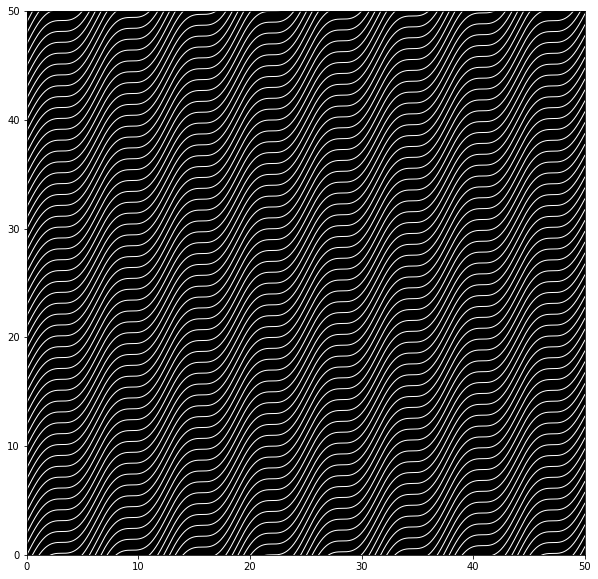

In [763]:
x,w = waves_uni(1001,100)
plot_waves(x,w)
plt.savefig('Images/waves/basic_uniform.png')

In [739]:
def waves_random(nx,ny,spacing=0.5,step=0.5,noise_mult=1,frequency=0.6,waveshift_type='random',waveshift_deg=40,
                 waveshift_displace=1,sin_phase=0,lin_slope=1,freqshift_degree=1,phase_mult=1):

    x = np.zeros([nx,ny])
    x += np.reshape(np.linspace(0,50,nx),[nx,1])
    w = np.zeros([nx,ny])
#     step = 50/(nx-1)
    
    y_mult = np.random.uniform(1-noise_mult*step,1+noise_mult*step,size=ny)
    if waveshift_type=='none':
        y_freq_mult=[1]*ny
    elif waveshift_type=='linear':
        y_freq_mult = [step/waveshift_deg]*ny
        y_freq_mult = lin_slope*np.cumsum(y_freq_mult) + waveshift_displace
    elif waveshift_type=='linear_sin':
        y_freq_mult = [step/waveshift_deg]*ny
        y_freq_mult = np.sin(sin_phase + np.linspace(0,(np.pi*2),ny))*(lin_slope*np.cumsum(y_freq_mult))/waveshift_deg + waveshift_displace
    elif waveshift_type=='sin':
        y_freq_mult = np.sin(sin_phase + np.reshape(np.linspace(0,(np.pi*2),ny),[ny,1]))/waveshift_deg + waveshift_displace
    else:
        y_freq_mult = np.random.uniform(-step/waveshift_deg,step/waveshift_deg,size=ny)
        y_freq_mult = 1 + np.cumsum(y_freq_mult)
    
    for i in range(ny):
        w[:,i] = x[:,i] + y_mult[i]*np.sin(frequency*y_freq_mult[i]*((x[:,i]**freqshift_degree) + phase_mult*i/np.pi)) - spacing*ny/2 + spacing*i
    return (x,w)

In [804]:
# x,w = waves_uni(101,100)
#--ripple--#
# x,w = waves_random(1001,100,spacing=0.5,step=0.2,noise_mult=0.2,frequency=1.5,waveshift_type='sin',waveshift_displace=0.1,waveshift_deg=15,freqshift_degree=1.2,phase_mult=3)
#--gentle rolling wave--#
# x,w = waves_random(1001,200,spacing=0.5,step=0.2,noise_mult=0.3,frequency=0.75,waveshift_type='linear',waveshift_displace=0.1,waveshift_deg=30,freqshift_degree=1.01,phase_mult=1)
# x,w = waves_random(1001,100,spacing=0.5,step=0.1,noise_mult=2,frequency=1.75,waveshift_type='linear',waveshift_displace=0.1,waveshift_deg=30,lin_slope=1,freqshift_degree=1.01,phase_mult=1)
#--s waves--#
# x,w = waves_random(1001,200,step=0.04,noise_mult=1,frequency=0.75,waveshift_type='sin',waveshift_displace=1.5,waveshift_deg=10,sin_phase=np.pi/3,freqshift_degree=1.01,phase_mult=1)
#--uneven s wave
# x,w = waves_random(1001,100,0.01,20,frequency=0.75,waveshift_type='linear_sin',waveshift_displace=1.5,waveshift_deg=2,freqshift_degree=1.01,phase_mult=1)
#--s wave uneven--#
# x,w = waves_random(1001,100,spacing=0.5,step=0.01,noise_mult=0,frequency=0.75,waveshift_type='linear_sin',sin_phase=np.pi/2,waveshift_displace=1.5,waveshift_deg=2,freqshift_degree=1.01,phase_mult=1)
#--default--#
# x,w = waves_random(1001,100,frequency=1.2,step=0.3)

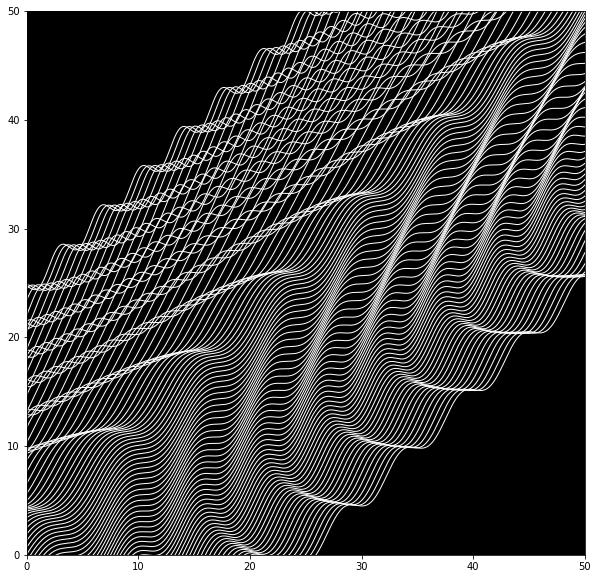

In [805]:
plot_waves(x,w)
# plt.savefig('Images/waves/smooth_ripple5.png')
# plt.setp(lines, linewidth=2, color='r')